In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import re
import h5py
from six.moves import range

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
%matplotlib inline

In [2]:
import sys
sys.path.append('/Users/perdue/Documents/MINERvA/AI/ANNMINERvA/')

from evtid_utils import decode_eventid
from mnvtf.reader_sqlite import MnvCategoricalSQLiteReader
from mnvtf.reader_text import MnvCategoricalTextReader

In [3]:
from mnvdlplot.conf_mat_pl import make_conf_mat_plots_rowcolnormonly
from mnvdlplot.conf_mat_pl import make_conf_mat_plots_raw

In [7]:
h5path = '/Users/perdue/Documents/MINERvA/AI/hdf5/201801/'
h5name = h5path + 'hadmultkineimgs_127x94_me1Pmc.hdf5'
h5file = h5py.File(h5name, 'r')

In [9]:
dbpath = '/Users/perdue/Documents/MINERvA/AI/minerva_tf/predictions/201801/'
dbname = dbpath + 'mnv_st_epsilon_predictionsME1LOPMC_VALIDCHECK_model_20180323_def_chngdpad_planecodes_nclass173_trainME1LOPMC_validME1LOPMC_testME1LOPMC_optADAM_batchsz1024_nodoBatchNorm_tev.txt.gz'
n_classes = 173
reader_mc = MnvCategoricalSQLiteReader(dbname)

In [7]:
for evt, pc in zip(h5file['event_data']['eventids'][:10], h5file['vtx_data']['planecodes'][:10]):
    rn, sb, gt, pe = decode_eventid(evt[0])
    planecd = pc[0]
    pred = reader_mc.get_argmax_prediction(rn, sb, gt, pe)
    print(planecd, pred)

18 18
95 96
44 44
157 157
98 99
91 91
142 142
60 60
157 157
115 115


In [22]:
n_total = len(h5file['event_data']['eventids'])
print(n_total)

1765828


In [25]:
confusion = np.zeros((n_classes, n_classes))
n_evts = 250000
if n_evts > n_total:
    n_evts = n_total
for evt, pc in zip(h5file['event_data']['eventids'][:n_evts], h5file['vtx_data']['planecodes'][:n_evts]):
    rn, sb, gt, pe = decode_eventid(evt[0])
    planecd = pc[0]
    pred = reader_mc.get_argmax_prediction(rn, sb, gt, pe)
#    if pred != planecd:
#        print(pred, planecd)
    # place by row, column
    confusion[pred, planecd] += 1

/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


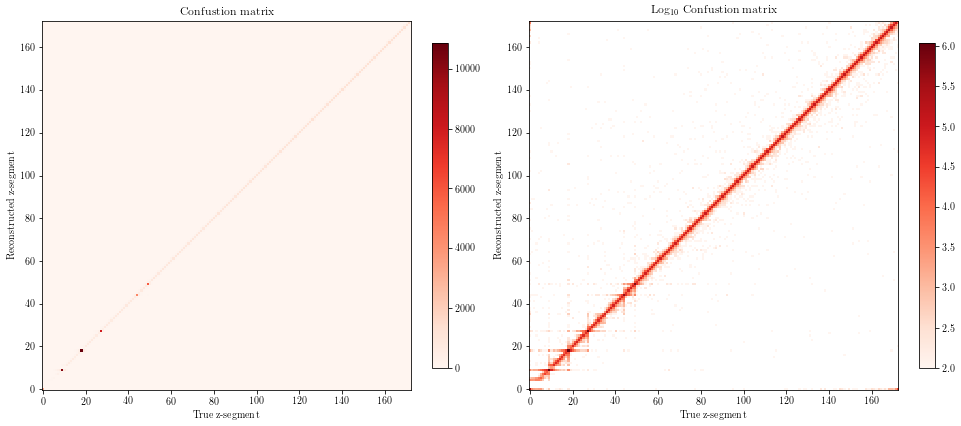

In [26]:
make_conf_mat_plots_raw(confusion, 'ABG_predcheck_A')

/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys
/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log10
/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in log10


purity (row-normalized diagonal values)
target  1: purity = 0.822 +/- 0.003 (stat)
target  2: purity = 0.875 +/- 0.003 (stat)
target  3: purity = 0.892 +/- 0.003 (stat)
target  4: purity = 0.798 +/- 0.005 (stat)
target  5: purity = 0.851 +/- 0.004 (stat)
efficiency (column-normalized diagonal values)
target  1: efficiency = 0.968 +/- 0.002 (stat)
target  2: efficiency = 0.955 +/- 0.002 (stat)
target  3: efficiency = 0.928 +/- 0.003 (stat)
target  4: efficiency = 0.899 +/- 0.004 (stat)
target  5: efficiency = 0.891 +/- 0.004 (stat)


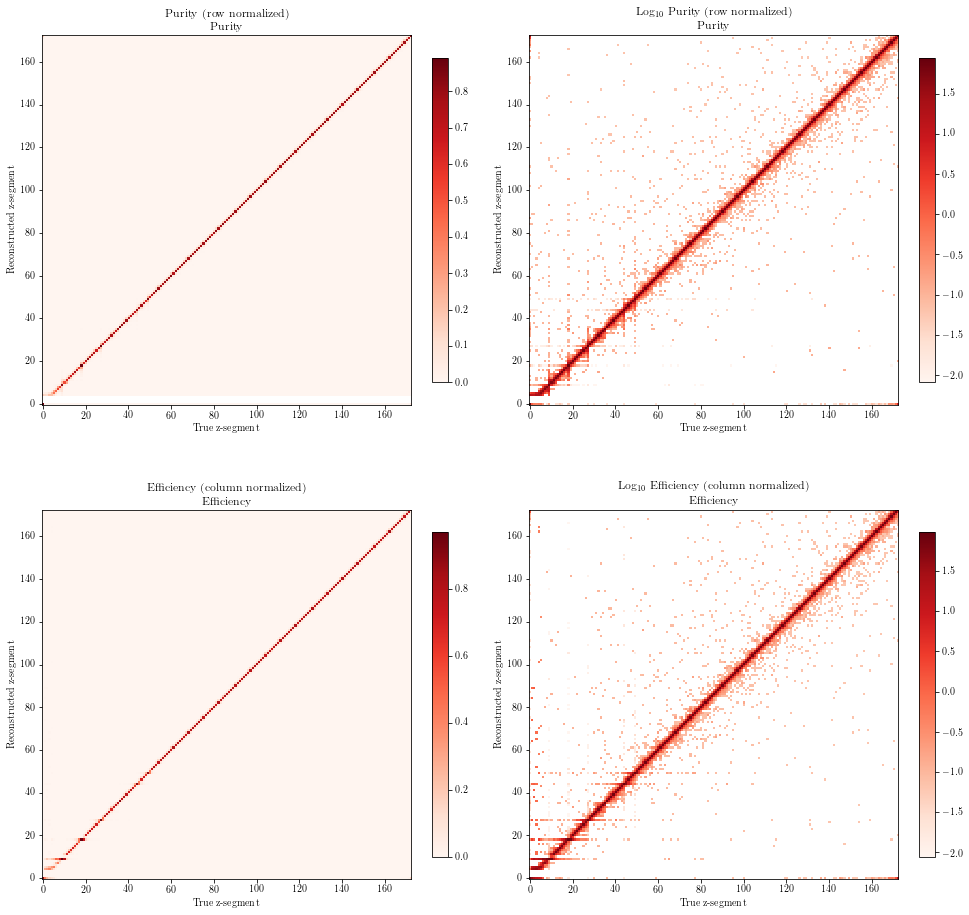

In [30]:
make_conf_mat_plots_rowcolnormonly(confusion, 'ABG_predcheck_A')